In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from log_parser import LogParser

In [2]:
parser = LogParser()
# parser.format_lists()
df = parser.df

/mnt/d/Code/summer_research/hybrid-vector-clocks/hvc/LOGFILES/E100.N8.I200.S7.log
/mnt/d/Code/summer_research/hybrid-vector-clocks/hvc/LOGFILES/E1000.N8.I200.S7.log
/mnt/d/Code/summer_research/hybrid-vector-clocks/hvc/LOGFILES/E10000.N8.I100.S7.log
/mnt/d/Code/summer_research/hybrid-vector-clocks/hvc/LOGFILES/E10000.N8.I1000.S7.log
/mnt/d/Code/summer_research/hybrid-vector-clocks/hvc/LOGFILES/E10000.N8.I10000.S7.log
/mnt/d/Code/summer_research/hybrid-vector-clocks/hvc/LOGFILES/E10000.N8.I50.S7.log
/mnt/d/Code/summer_research/hybrid-vector-clocks/hvc/LOGFILES/E500.N8.I200.S7.log
/mnt/d/Code/summer_research/hybrid-vector-clocks/hvc/LOGFILES/E5000.N8.I200.S7.log


In [3]:
df = df.sort_values(['time']).reset_index(drop = True)

In [4]:
df

,from_node,to_node,time,m.epoch,m.offsets,m.counters,e.epoch,e.offsets,e.counters,f.epoch,f.offsets,f.counters,f.offset_size,f.counter_size,epsilon,num_nodes,msg_count,send_threshold,interval
0,0,4,00:00:00 000001,6,100-0-5-100-0-100-0-100,0-0-0-0-1-0-1-0,6,0-100-100-100-100-100-1-0,1-0-0-0-0-0-0-0,6,0-100-100-100-100-100-1-0,1-0-0-0-0-0-0-0,1,1,100,8,161,0.007,200
1,6,7,00:00:00 000001,3,1000-1000-1000-1000-1000-1000-1000-0,0-0-0-0-0-0-0-1,3,1000-1000-1000-1000-0-0-0-1000,0-0-0-0-0-0-2-0,3,1000-1000-1000-1000-0-0-0-1000,0-0-0-0-0-0-2-0,0,1,1000,8,60,0.007,200
2,2,3,00:00:00 000001,0,500-500-500-0-500-500-500-500,0-0-0-0-0-0-0-0,0,500-500-0-500-500-500-500-500,0-0-1-0-0-0-0-0,0,500-500-0-500-500-500-500-500,0-0-1-0-0-0-0-0,0,1,500,8,2,0.007,200
3,0,4,00:00:00 000001,1,100-100-0-100-0-100-100-100,0-0-1-0-3-0-0-0,1,0-100-100-100-100-100-100-100,2-0-0-0-0-0-0-0,1,0-100-100-100-100-100-100-100,2-0-0-0-0-0-0-0,0,1,100,8,29,0.007,200
4,1,3,00:00:00 000001,1,5000-5000-5000-0-5000-5000-5000-5000,0-0-0-0-0-0-0-0,1,5000-0-5000-5000-5000-5000-5000-0,0-2-0-0-0-0-0-1,1,5000-0-5000-5000-5000-5000-5000-0,0-2-0-0-0-0-0-1,0,2,5000,8,38,0.007,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120448,4,3,00:00:00 000036,2731,0-1-0-0-0-0-0-0,0-0-0-0-0-0-0-0,2731,0-1-0-0-0-0-0-0,0-0-0-0-1-0-0-0,2731,0-1-0-0-0-0-0-0,0-0-0-0-1-0-0-0,1,1,10000,8,15157,0.007,50
120449,4,2,00:00:00 000037,684,0-0-0-0-0-0-0-0,2-0-3-3-0-3-0-7,686,0-0-0-0-0-0-0-0,0-0-0-0-5-2-1-0,686,0-0-0-0-0-0-0-0,0-0-0-0-5-2-1-0,0,3,5000,8,15090,0.007,200
120450,4,5,00:00:00 000037,684,0-0-0-0-0-0-0-0,1-0-1-2-0-2-0-5,685,0-0-0-0-0-0-0-0,0-0-0-0-5-0-0-0,685,0-0-0-0-0-0-0-0,0-0-0-0-5-0-0-0,0,1,5000,8,15065,0.007,200
120451,2,4,00:00:00 000037,687,0-0-0-0-0-0-0-0,0-0-0-0-1-0-0-0,687,0-0-0-0-0-0-0-0,0-0-0-0-1-0-0-0,687,0-0-0-0-0-0-0-0,0-0-0-0-1-0-0-0,0,1,5000,8,15110,0.007,200


100 epsilon 200 interval


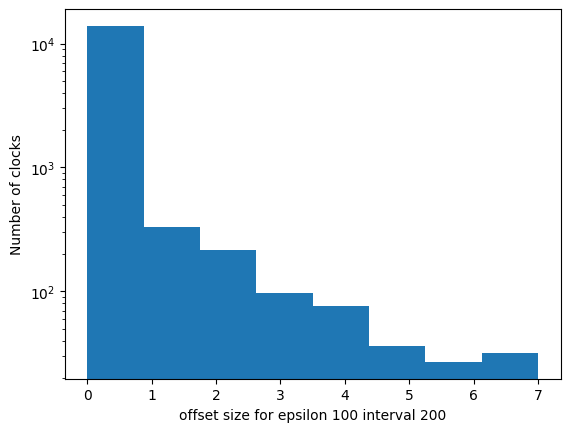

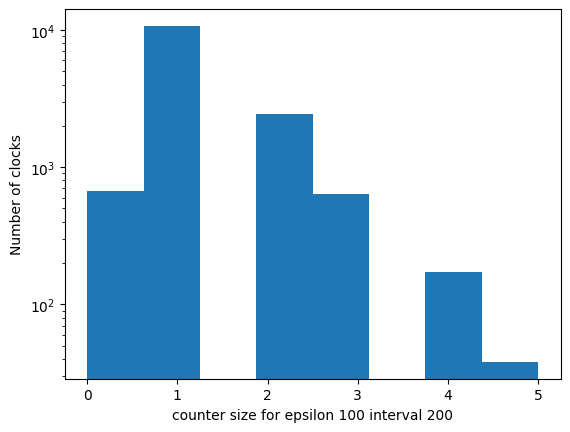

100 epsilon 100 interval
100 epsilon 10000 interval
100 epsilon 50 interval
100 epsilon 1000 interval
1000 epsilon 200 interval


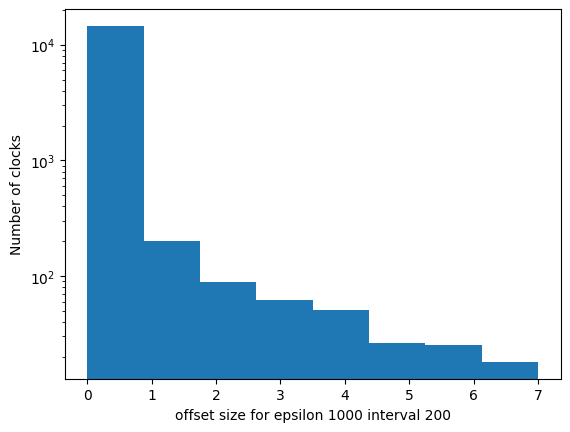

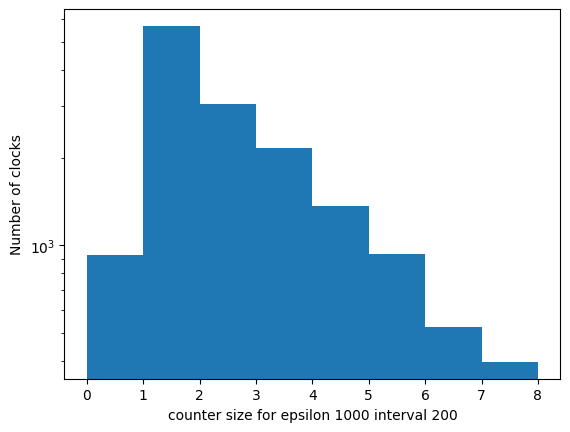

1000 epsilon 100 interval
1000 epsilon 10000 interval
1000 epsilon 50 interval
1000 epsilon 1000 interval
500 epsilon 200 interval


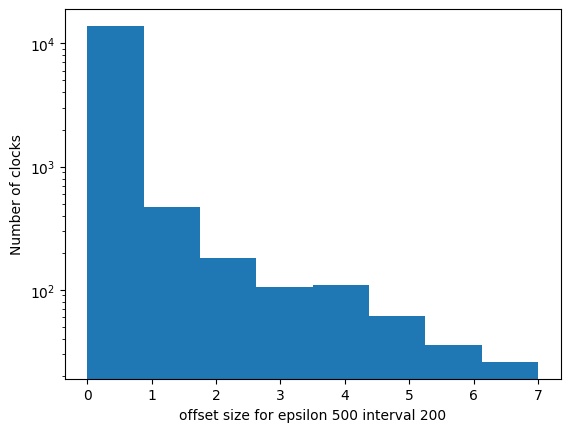

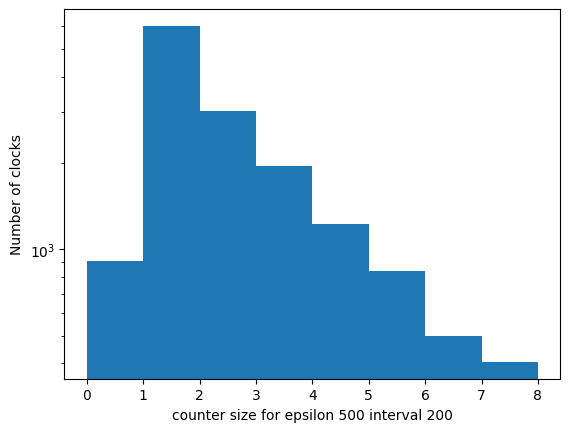

500 epsilon 100 interval
500 epsilon 10000 interval
500 epsilon 50 interval
500 epsilon 1000 interval
5000 epsilon 200 interval


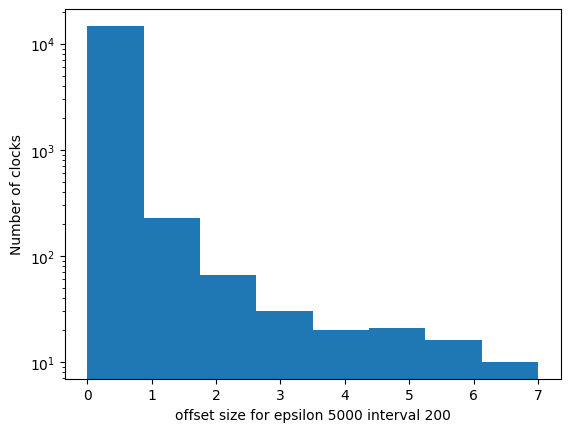

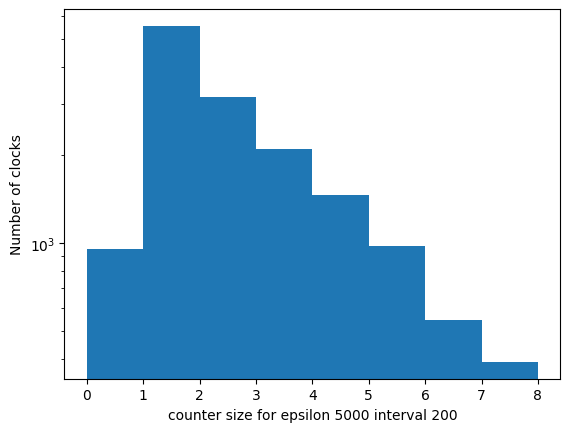

5000 epsilon 100 interval
5000 epsilon 10000 interval
5000 epsilon 50 interval
5000 epsilon 1000 interval
10000 epsilon 200 interval
10000 epsilon 100 interval


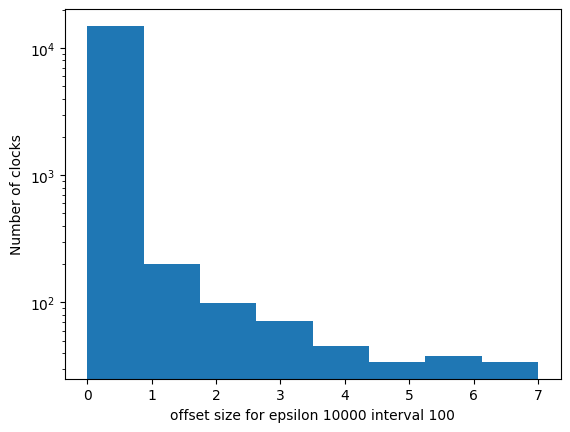

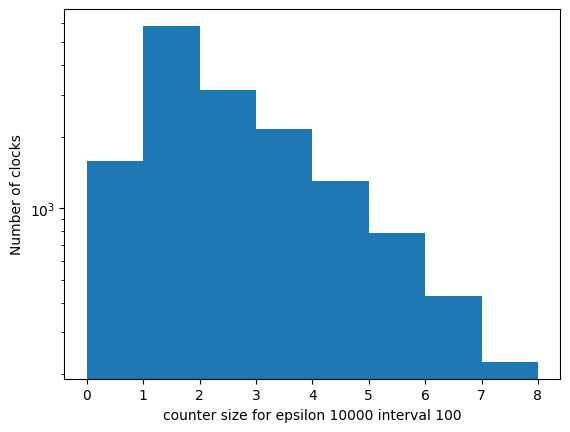

10000 epsilon 10000 interval


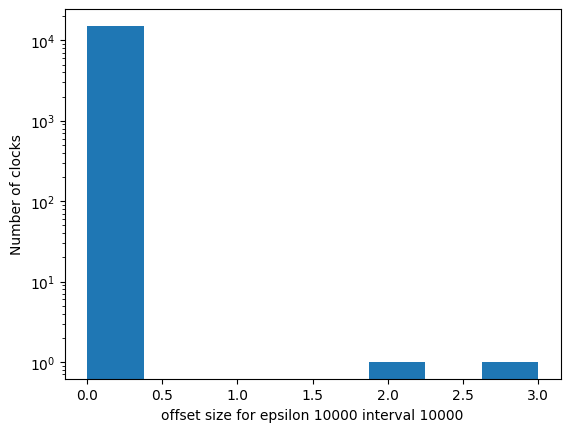

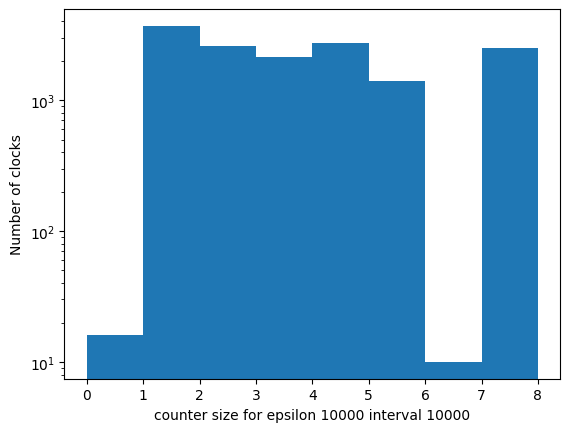

10000 epsilon 50 interval


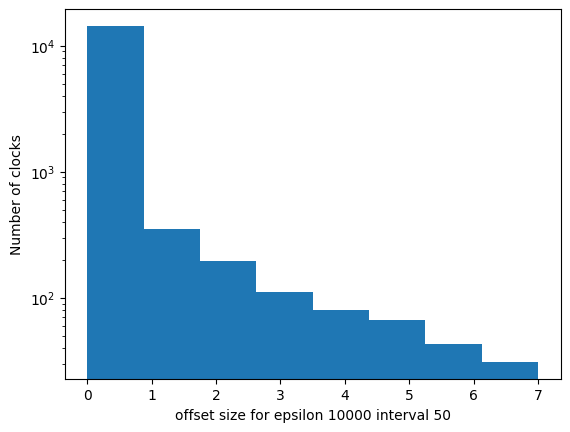

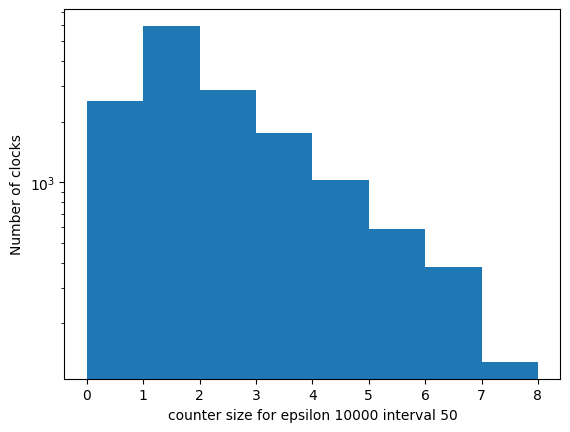

10000 epsilon 1000 interval


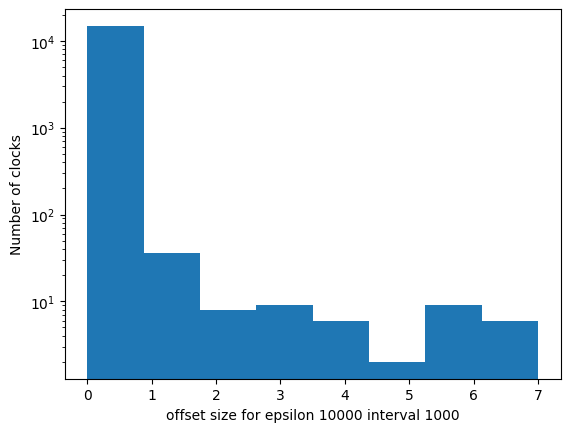

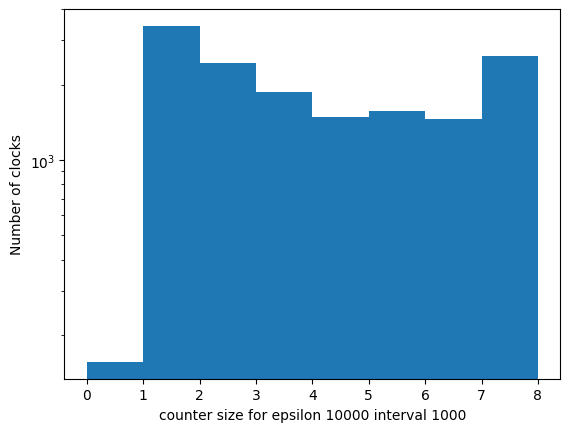

In [11]:
for epsilon in df['epsilon'].unique():
    for interval in df['interval'].unique():
        print('{} epsilon {} interval'.format(epsilon,  interval))
        sample_df = df[(df['epsilon'] == epsilon) & (df['interval'] == interval)]
        if len(sample_df.index) == 0:
            continue
        plt.hist(sample_df['f.offset_size'], bins = 8, log = True)
        plt.xlabel('offset size for epsilon {} interval {}'.format(epsilon, interval))
        plt.ylabel('Number of clocks')
        plt.show()
        plt.hist(sample_df['f.counter_size'], bins = 8, log = True)
        plt.xlabel('counter size for epsilon {} interval {}'.format(epsilon, interval))
        plt.ylabel('Number of clocks')
        plt.show()    